# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 12 Task 2 - Web Scraping
### Assignment by: Kat Weissman

#### Objectives:

- Web Scraping
- Document data collected with web scraping

*Recommended learning resources:*
- https://realpython.com/beautiful-soup-web-scraper-python/

I will use the requests and Beautiful Soup libraries as recommended in the tutorial link above.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

### Level 1
### Exercise 1 
Scrape a page on the Madrid Stock Exchange (https://www.bolsamadrid.es) using BeautifulSoup and Selenium.

I chose to use the english version of the site: https://www.bolsamadrid.es/ing/aspx/Portada/Portada.aspx

This is what the home page looks like on February 18, 2022:

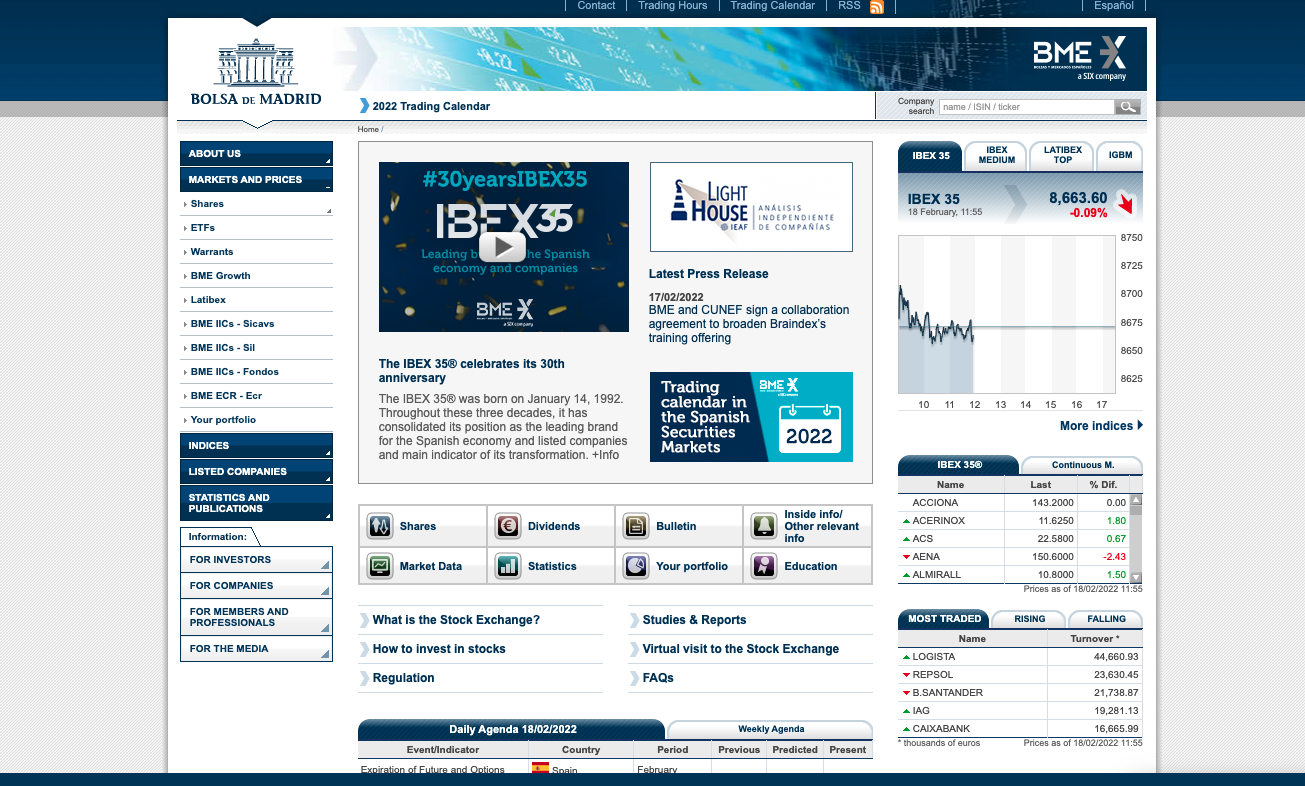

The page I am interested in scraping can be accessed through the menu under Listed Companies > New Listings: https://www.bolsamadrid.es/ing/aspx/Empresas/Admisiones.aspx

This is what the page looks like on February 18, 2022:

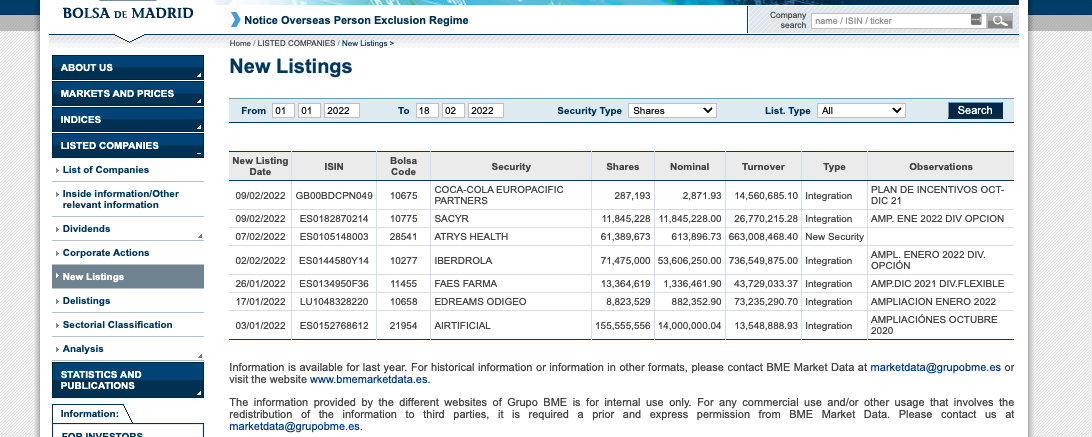

There is a legal disclaimer at the bottom of the page which states that any use of the data requires permission from BME Market Data, and it lists contact information. I will just be using this data for learning purposes and will not distribute it to any third parties.

##### Inspect the Site Using Developer Tools

Using developer tools in Chrome, I was able to find the table element that is storing the information that interests me.

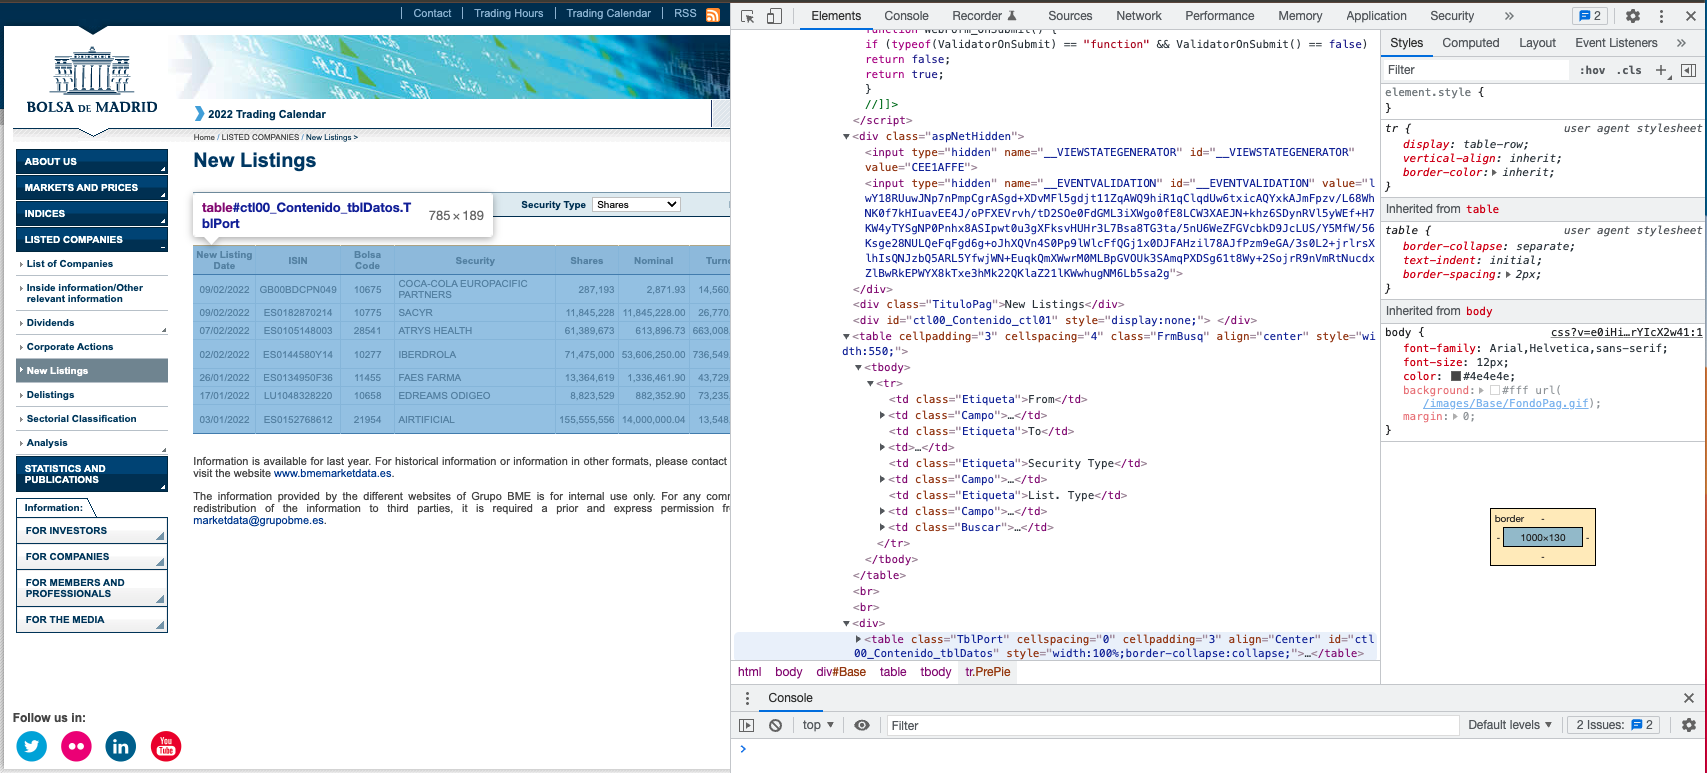

##### Scrape HTML Content From a Page

Scrape the data using the requests library.

In [2]:
# Assign the webpage link to a variable called URL
URL = "https://www.bolsamadrid.es/ing/aspx/Empresas/Admisiones.aspx"
# Use the requests library to scrape the html content into a variable called page
page = requests.get(URL)

##### Parse HTML Code With Beautiful Soup

In [3]:
# Assign parsed html content from the page to a variable called soup using library BeautifulSoup
soup = BeautifulSoup(page.content, "html.parser")

Using the Chrome developer tools, I identified the section of html that I'm interested in. Below is what it looks like when I copy the html element from Chrome developer tools. The id of the element is "ctl00_Contenido_tblDatos"

```html
<table class="TblPort" cellspacing="0" cellpadding="3" align="Center" id="ctl00_Contenido_tblDatos" style="width:100%;border-collapse:collapse;">
		<tbody><tr align="center">
			<th scope="col">New&nbsp;Listing<br>Date</th><th scope="col">ISIN</th><th scope="col">Bolsa Code</th><th scope="col">Security</th><th scope="col">Shares</th><th scope="col">Nominal</th><th scope="col">Turnover</th><th scope="col">Type</th><th class="Ult" scope="col">Observations</th>
		</tr><tr>
			<td align="center">09/02/2022</td><td align="center">GB00BDCPN049</td><td align="center">10675</td><td>COCA-COLA EUROPACIFIC PARTNERS</td><td align="right">287,193</td><td align="right">2,871.93</td><td align="right">14,560,685.10</td><td style="white-space:nowrap;">Integration</td><td class="Ult">PLAN DE INCENTIVOS OCT-DIC 21</td>
		</tr><tr>
			<td align="center">09/02/2022</td><td align="center">ES0182870214</td><td align="center">10775</td><td>SACYR</td><td align="right">11,845,228</td><td align="right">11,845,228.00</td><td align="right">26,770,215.28</td><td style="white-space:nowrap;">Integration</td><td class="Ult">AMP. ENE 2022 DIV OPCION</td>
		</tr><tr>
			<td align="center">07/02/2022</td><td align="center">ES0105148003</td><td align="center">28541</td><td>ATRYS HEALTH</td><td align="right">61,389,673</td><td align="right">613,896.73</td><td align="right">663,008,468.40</td><td style="white-space:nowrap;">New Security</td><td class="Ult">&nbsp;</td>
		</tr><tr>
			<td align="center">02/02/2022</td><td align="center">ES0144580Y14</td><td align="center">10277</td><td>IBERDROLA</td><td align="right">71,475,000</td><td align="right">53,606,250.00</td><td align="right">736,549,875.00</td><td style="white-space:nowrap;">Integration</td><td class="Ult">AMPL. ENERO 2022 DIV. OPCIÓN</td>
		</tr><tr>
			<td align="center">26/01/2022</td><td align="center">ES0134950F36</td><td align="center">11455</td><td>FAES FARMA</td><td align="right">13,364,619</td><td align="right">1,336,461.90</td><td align="right">43,729,033.37</td><td style="white-space:nowrap;">Integration</td><td class="Ult">AMP.DIC 2021  DIV.FLEXIBLE</td>
		</tr><tr>
			<td align="center">17/01/2022</td><td align="center">LU1048328220</td><td align="center">10658</td><td>EDREAMS ODIGEO</td><td align="right">8,823,529</td><td align="right">882,352.90</td><td align="right">73,235,290.70</td><td style="white-space:nowrap;">Integration</td><td class="Ult">AMPLIACION ENERO 2022</td>
		</tr><tr>
			<td align="center">03/01/2022</td><td align="center">ES0152768612</td><td align="center">21954</td><td>AIRTIFICIAL</td><td align="right">155,555,556</td><td align="right">14,000,000.04</td><td align="right">13,548,888.93</td><td style="white-space:nowrap;">Integration</td><td class="Ult">AMPLIACIÓNES OCTUBRE 2020</td>
		</tr>
	</tbody></table>
```

In [4]:
# save the results using the id of the element of interest
results = soup.find(id="ctl00_Contenido_tblDatos")

In [5]:
print(results.prettify())

<table align="Center" cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblDatos" width="100%">
 <tr align="center">
  <th scope="col">
   New Listing
   <br/>
   Date
  </th>
  <th scope="col">
   ISIN
  </th>
  <th scope="col">
   Bolsa Code
  </th>
  <th scope="col">
   Security
  </th>
  <th scope="col">
   Shares
  </th>
  <th scope="col">
   Nominal
  </th>
  <th scope="col">
   Turnover
  </th>
  <th scope="col">
   Type
  </th>
  <th class="Ult" scope="col">
   Observations
  </th>
 </tr>
 <tr>
  <td align="center">
   09/02/2022
  </td>
  <td align="center">
   GB00BDCPN049
  </td>
  <td align="center">
   10675
  </td>
  <td>
   COCA-COLA EUROPACIFIC PARTNERS
  </td>
  <td align="right">
   287,193
  </td>
  <td align="right">
   2,871.93
  </td>
  <td align="right">
   14,560,685.10
  </td>
  <td nowrap="nowrap">
   Integration
  </td>
  <td class="Ult">
   PLAN DE INCENTIVOS OCT-DIC 21
  </td>
 </tr>
 <tr>
  <td align="center">
   09/02/2022
  </td>
  <td 

It is important to understand the coding of tables in HTML: 
- https://www.w3schools.com/tags/tag_table.asp

Basically, the important information from the reference link is: 

"An HTML table consists of one "table" element and one or more "tr", "th", and "td" elements.

The "tr" element defines a table row, the "th" element defines a table header, and the "td" element defines a table cell."
  

##### Using Pandas to read the Table  
This is a good reference page about scraping HTML Tables with Beautiful Soup and pandas:
- https://towardsdatascience.com/a-guide-to-scraping-html-tables-with-pandas-and-beautifulsoup-7fc24c331cf7

In [6]:
dfs = pd.read_html(page.text)

In [7]:
print(dfs)

[                                                   0  \
0  Español Contact Trading Hours Trading Calendar...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                   1  \
0  Español Contact Trading Hours Trading Calendar...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   

                                                   2  \
0  Español Contact Trading Hours Trading Calendar...   
1                                                NaN   
2           Home / LISTED COMPANIES / New Lis

Below is the table of interest in a Pandas dataframe.

In [8]:
df = dfs[2]
df

,New ListingDate,ISIN,Bolsa Code,Security,Shares,Nominal,Turnover,Type,Observations
0,09/02/2022,GB00BDCPN049,10675,COCA-COLA EUROPACIFIC PARTNERS,287193,2871.93,1.456069e+07,Integration,PLAN DE INCENTIVOS OCT-DIC 21
1,09/02/2022,ES0182870214,10775,SACYR,11845228,11845228.00,2.677022e+07,Integration,AMP. ENE 2022 DIV OPCION
2,07/02/2022,ES0105148003,28541,ATRYS HEALTH,61389673,613896.73,6.630085e+08,New Security,NaN
3,02/02/2022,ES0144580Y14,10277,IBERDROLA,71475000,53606250.00,7.365499e+08,Integration,AMPL. ENERO 2022 DIV. OPCIÓN
4,26/01/2022,ES0134950F36,11455,FAES FARMA,13364619,1336461.90,4.372903e+07,Integration,AMP.DIC 2021 DIV.FLEXIBLE
5,17/01/2022,LU1048328220,10658,EDREAMS ODIGEO,8823529,882352.90,7.323529e+07,Integration,AMPLIACION ENERO 2022
6,03/01/2022,ES0152768612,21954,AIRTIFICIAL,155555556,14000000.04,1.354889e+07,Integration,AMPLIACIÓNES OCTUBRE 2020


### Level 2
### Exercise 2
Document in a word your data set generated with the information that the different Kaggle files have.

I will come back to this exercise if I have time.

### Level 3
### Exercise 3
Choose a web page you want and do web scraping using the Scrapy library.

I will come back to this exercise if I have time.